# SVD(Singular Value Decomposition)
 - 특이행렬분해 (비정방행렬)
 - eigen 분해 (고유값 분해, 정방행렬)
 - 컴퓨터에선 구분 없이 SVD로 두 분해를 구현함.

In [4]:
import numpy as np
from scipy import linalg

A = np.array([[1, 2, 3], [4, 5, 6]])
A

# 특징은 '열'로 파악

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
M, N = A.shape
M, N   # 2행 3열로 이루어짐

(2, 3)

In [ ]:
U, s, Vh = linalg.svd(A)  # 행 특징, s는 고유값처럼 분산 크기가 됨, 열 특징  # 고유값 분해를 한 것과 같은 효과 -> s, Vh를 통해
U, s, Vh

# 공분산 만들고 구해진 -> (2, 2), 고유값 -> 2, (3, 3)

(array([[-0.3863177 , -0.92236578],
        [-0.92236578,  0.3863177 ]]),
 array([9.508032  , 0.77286964]),
 array([[-0.42866713, -0.56630692, -0.7039467 ],
        [ 0.80596391,  0.11238241, -0.58119908],
        [ 0.40824829, -0.81649658,  0.40824829]]))

In [ ]:
# 행렬 곱을 해야 돌아감. (s를 n차원으로 바꾸는)
Sig = linalg.diagsvd(s, M, N)
Sig

array([[9.508032  , 0.        , 0.        ],
       [0.        , 0.77286964, 0.        ]])

### 원래 값으로 돌아감

In [ ]:
U.dot(Sig.dot(Vh))   # U @ (Sig @ Vh)와 같은 의미

array([[1., 2., 3.],
       [4., 5., 6.]])

#PCA

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
iris = sns.load_dataset('iris')
print(iris.head())
print(iris.shape)  # (150, 5)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
(150, 5)


(150, 2)


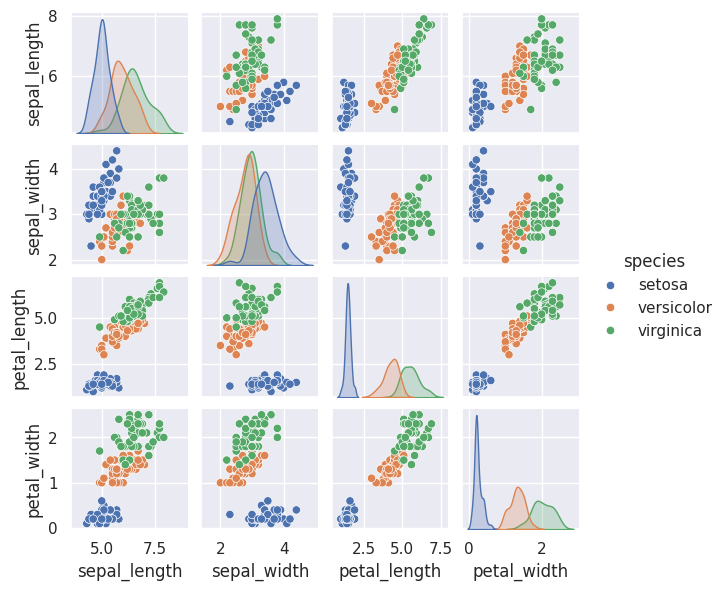

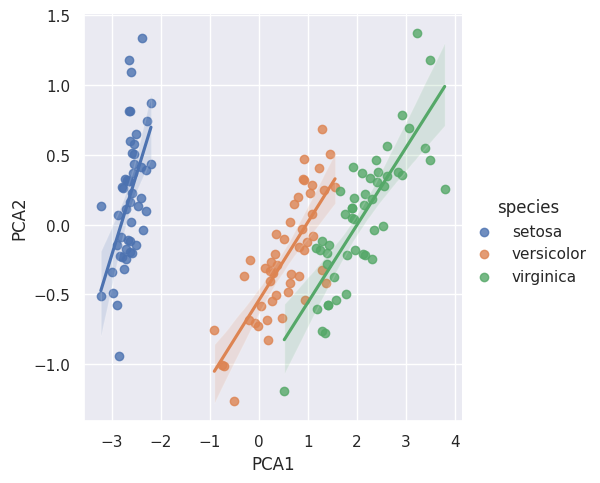

In [ ]:
sns.pairplot(iris, hue = 'species', height = 1.5)  # hue 사용: 다차원 시각화
X_iris = iris.iloc[:, :4]

from sklearn.decomposition import PCA
model = PCA(n_components = 2)  # 2개로 차원 축소(PCA 과정: 상관계수행렬 (4x4) -> 고유값 분해(고유치(4개), 고유벡터(4x4)) (축 정직교))
# 2 + (4x2)   # 2개는 noise 축으로 본다.
model.fit(X_iris)
# 새로운 축에 데이터 재표현 (두 개를 내적하면 재표현)
# 왜 재표현하나? 정직교축은 다중공선성이 없음. 그래서 노이즈 제거 진행됨.

X_2D = model.transform(X_iris)  # (150x4)(4x2) => 150x2 (새롭게 변형된 데이터)
print(X_2D.shape)

iris['PCA1'] = X_2D[:, 0]  # 새로운 축으로 표현  # 시각화 가능해짐
iris['PCA2'] = X_2D[:, 1]
# 선형회귀
sns.lmplot(x = 'PCA1', y = 'PCA2', hue = 'species', data = iris, fit_reg = True)
plt.show()

# 행렬 만드는 과정

In [ ]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5

X = np.empty((m, 3))

# 모든 음성데이터 cos + sin
X[:, 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print('X.shape:', X.shape)  # (60, 3)

X.shape: (60, 3)


### 문제1

In [ ]:
# 공분산행렬 sum((데이터1 - 평균), (데이터2 - 평균)) / (n-1)     (상관계수 구하는 식)
# 각 열의 평균을 구하라 (x 데이터에 함수 적용, 방향 주면 된다.)
X.mean(axis = 0)

array([0.02406745, 0.20932515, 0.07155422])

In [ ]:
# broad casting (양쪽 차수를 일치시켜야 함.)
# (60 x 3) (1 x 3)
X - X.mean(axis = 0)

array([[-1.03976771e+00, -7.60238460e-01, -3.32880482e-01],
       [-3.17841939e-02,  3.90260570e-01, -3.64766659e-02],
       [-9.77238797e-01, -6.73862060e-01, -3.20757101e-01],
       [-9.44190485e-01,  7.70779228e-04, -4.97304144e-02],
       [-7.87164831e-01, -5.10641487e-02,  1.19970744e-01],
       [ 1.09409378e+00,  1.15762056e-01,  2.45551498e-01],
       [-1.04665623e+00, -8.53165791e-01, -2.05241169e-01],
       [ 6.49452398e-01, -4.82750342e-01, -7.94325731e-02],
       [ 9.92128132e-01,  3.06140931e-01,  3.96278747e-01],
       [ 5.25509785e-01,  4.67955007e-01,  1.62461684e-01],
       [-1.01367188e+00, -2.00458976e-01, -1.93074561e-01],
       [ 1.10841362e+00,  7.29745189e-02, -1.82449496e-03],
       [-1.01744457e+00, -4.77653389e-01, -2.29165228e-01],
       [-9.71704237e-01, -7.08910047e-01, -2.10833327e-01],
       [ 1.07688965e+00, -3.86770525e-02,  2.63501050e-02],
       [-3.70113351e-01,  2.44018985e-01, -7.21578839e-03],
       [ 6.66958762e-01, -4.82702763e-01

In [ ]:
X_cen = X - X.mean(axis = 0)

# 공분산 행렬

In [ ]:
X_cov = np.dot(X_cen.T, X_cen) / (60-1) # 3 x 60, 60 x 3 => 3 x 3

# 고유값 분해

In [ ]:
w, v = np.linalg.eig(X_cov)
print('eigenvalue:', w)  # 고유치: 축방향으로의 분산 크기
print('eigenvector: \n', v)  # 고유벡터

eigenvalue: [0.77830975 0.1351726  0.01034272]
eigenvector: 
 [[ 0.93636116  0.34027485 -0.08626012]
 [ 0.29854881 -0.90119108 -0.31420255]
 [ 0.18465208 -0.2684542   0.94542898]]


In [ ]:
# [ 0.29854881 -0.90119108 -0.31420255] 이 방향으로 1이 되는지 확인하라.
# 수학적으로 내적이 0이면 직교.
np.sqrt(np.sum(v[1] ** 2))

0.9999999999999999

In [ ]:
# 열로 보려면
np.sqrt(np.sum(v[:, 1] ** 2))

1.0

In [ ]:
print("설명력:", w/w.sum())

설명력: [0.84248607 0.14631839 0.01119554]


In [ ]:
# D가 절반으로 나옴.
U, D, V_t = np.linalg.svd(X_cen)
print(U.shape, D.shape, V_t.shape)
D

(60, 60) (3,) (3, 3)


array([6.77645005, 2.82403671, 0.78116597])

In [ ]:
# 설명력을 보려면 제곱을 해줘야 함.
print("explained varience ratio:", D ** 2 / np.sum(D ** 2))

explained varience ratio: [0.84248607 0.14631839 0.01119554]


In [ ]:
V_t.T

array([[ 0.93636116, -0.34027485, -0.08626012],
       [ 0.29854881,  0.90119108, -0.31420255],
       [ 0.18465208,  0.2684542 ,  0.94542898]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

### SVD의 가운데

In [ ]:
print('singular value:', pca.singular_values_)  # D

singular value: [6.77645005 2.82403671 0.78116597]


In [ ]:
print('singular vector: \n', pca.components_.T)

singular vector: 
 [[ 0.93636116 -0.34027485 -0.08626012]
 [ 0.29854881  0.90119108 -0.31420255]
 [ 0.18465208  0.2684542   0.94542898]]


In [ ]:
# 분산 값으로 표현하면
print('eigen_value:', pca.explained_variance_)

eigen_value: [0.77830975 0.1351726  0.01034272]


In [ ]:
print('explained varience ratio:', pca.explained_variance_ratio_)

explained varience ratio: [0.84248607 0.14631839 0.01119554]


In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)

d = np.argmax(cumsum >= 0.85) + 1  # 인덱스
print('선택할 차원 수:', d)

[0.84248607 0.98880446 1.        ]
선택할 차원 수: 2


In [ ]:
# 85% 이상을 설명하는 변수 선택
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [ ]:
pca = PCA(n_components = 0.95)  # 95%를 설명하는 변수까지 남기고, 나머지는 제거하라.
X_proj = pca.fit_transform(X)
pca.components_.T

array([[ 0.93636116, -0.34027485],
       [ 0.29854881,  0.90119108],
       [ 0.18465208,  0.2684542 ]])

# 다음주에는 텐서플로우 하겠지~ 하시면서 시작

In [ ]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 차수
train_x.shape  # (60000, 28, 28, 1)  # 흑백
# 28, 28 이미지의 사이즈  # 28 * 28  # 밑에꺼 먼저 돌려서 값 다름.

(60000, 784)

In [ ]:
# 데이터는 한 행으로 입력 (fully connected)
train_x = train_x.reshape(-1, 28*28)  # 28*28을 한 행으로 만들겠다. # 나머지 다 읎애라.
pca = PCA(n_components = 0.95)

X_reduced = pca.fit_transform(train_x)
print(pca.n_components_)  # 154가 남음. (784 -> 154로 차원 축소됨.)

154


In [ ]:
X_reduced.shape

(60000, 154)

### 원래 데이터로 돌아감 (inverse_transform)

In [ ]:
X_recovered = pca.inverse_transform(X_reduced)
X_recovered.shape

(60000, 784)

# 시각화

In [ ]:
# 강사님 코드 오류

import matplotlib
def plot_digits(instances, images_per_row=5, **options):   # **: dict형으로 매개변수하겠다
    size = 28
    images_per_row = min(len(instances), images_per_row)  # 이미지 개수 제어를 위해 존재

    # 데이터 입력은 784로 들어옴. 그걸 28x28로 바꾸겠다는 것.
    # 한 행으로 이미지가 있고, 5개씩 빼고 있음.
    images = [instance.reshape(size,size) for instance in instances]

    # 행 수 결정
    n_rows = (len(instances) - 1 // images_per_row + 1)  # 몫나눗셈
    row_images = []  # 한 행의 이미지

    # 한 행의 이미지 수 * 행 당 이미지 개수 => 행 수 * 행 당 이미지 개수  # 빈 이미지 출력공간 활용(사각형으로 출력해야 하니까)
    n_empty = n_row * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))  # 빈 공간까지 미리 준비하겠다.

    # 한 행씩 가져와서 계산
    for row in range(n_rows):

      # 한 행 * 이미지 개수
      rimages = images[row * images_per_row: (row + 1) * images_per_row]

      # 한 행의 이미지 5개가 결합한 다음 추가함
      row_images.append(np.concatenate(rimages, axis = 1))  # 열 추가
    image = np.concatenate(row_images, axis = 0)  # 한 행 추가

    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis('off')

### 돌아가게 수정한 Version

In [ ]:
import matplotlib
import numpy as np

def plot_digits(instances, images_per_row=5, **options):   # **: dict형으로 매개변수하겠다
    size = 28
    images_per_row = min(len(instances), images_per_row)  # 이미지 개수 제어를 위해 존재

    # 데이터 입력은 784로 들어옴. 그걸 28x28로 바꾸겠다는 것.
    # 한 행으로 이미지가 있고, 5개씩 빼고 있음.
    images = [instance.reshape(size,size) for instance in instances]

    # 행 수 결정
    # n_rows 계산을 수정: 올바른 행 수를 계산하도록 수정합니다.
    n_rows = (len(instances) + images_per_row - 1) // images_per_row
    row_images = []  # 한 행의 이미지

    # 한 행의 이미지 수 * 행 당 이미지 개수 => 행 수 * 행 당 이미지 개수  # 빈 이미지 출력공간 활용(사각형으로 출력해야 하니까)
    # n_empty 계산을 수정: 올바른 빈 이미지 수를 계산하도록 수정합니다.
    n_empty = n_rows * images_per_row - len(instances)
    images.extend([np.zeros((size, size)) for _ in range(n_empty)])  # 빈 공간까지 미리 준비하겠다.
    # images.append(np.zeros((size, size * n_empty)))  # 빈 공간까지 미리 준비하겠다.

    # 한 행씩 가져와서 계산
    for row in range(n_rows):

      # 한 행 * 이미지 개수
      rimages = images[row * images_per_row: (row + 1) * images_per_row]

      # 한 행의 이미지 5개가 결합한 다음 추가함
      # rimages가 비어 있지 않은지 확인합니다.
      if rimages:
          row_images.append(np.concatenate(rimages, axis=1))  # 열 추가

    # row_images가 비어 있지 않은지 확인합니다.
    if row_images:
        image = np.concatenate(row_images, axis=0)  # 한 행 추가
        plt.imshow(image, cmap=matplotlib.cm.binary, **options)
        plt.axis('off')

### 왼쪽 이미지와 오른쪽 이미지의 차이
 - 연산 오류: 0을 0이라 하지 못하는 컴퓨터의 운명
 - 784 -> 174 -> 784로 복원

Text(0.5, 1.0, 'no noise')

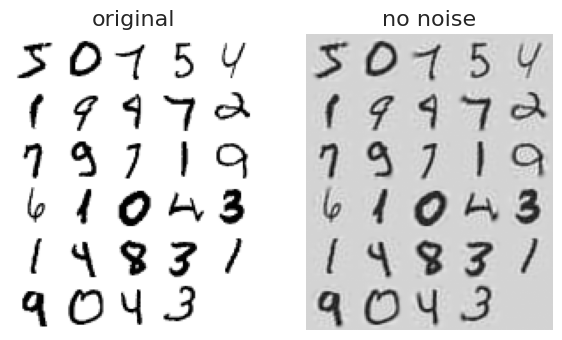

In [ ]:
import numpy as np
plt.figure(figsize = (7, 4))
plt.subplot(121)
plot_digits(train_x[::2100])  # 건너뛰면서
plt.title('original', fontsize = 16)
plt.subplot(122)

plot_digits(X_recovered[::2100])
plt.title('no noise', fontsize = 16)

# Incremental PCA

In [ ]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100

inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(train_x, n_batches):  # 학습 데이터를 분할 # 사실 의미는 없는데, 해본 것.
  print(".", end = "")
  inc_pca.partial_fit(X_batch)  # 부분 피팅

X_inc_reduced = inc_pca.transform(train_x)  # 60,000 x 154

....................................................................................................

In [ ]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_inc_reduced)  # 60,000 x 784
X_recovered_inc_pca.shape

(60000, 784)

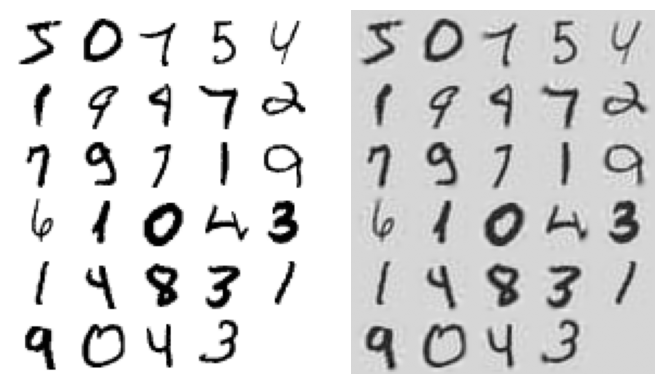

In [ ]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(train_x[::2100])
plt.subplot(122)

plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

### 파일 저장하기

In [ ]:
filename = "my_mnist.data"
m, n = train_x.shape

# memmap -> 파일을 연결시킴 (대용량일 때, 메모리 로딩이 불가능)
X_mm = np.memmap(filename, dtype = 'float32', mode = 'write', shape = (m, n))
X_mm[:] = train_x

In [ ]:
del X_mm  # 객체 삭제

### 파일에 새롭게 연결하기

In [ ]:
# 데이터 사이즈가 1/5로 줄어듦. 그래도 메모리가 감당을 못한다? 그럼 안 된다 .
X_mm = np.memmap(filename, dtype = 'float32', mode = 'readonly', shape=(m,n))
batch_size = m // n_batches

inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=600, n_components=154)

### 실시간으로 PCA를 하는 경우, RandomizedPCA가 유리

In [ ]:
import time
for n_components in (2, 10, 154):
  print("n_components = ", n_components)
  regular_pca = PCA(n_components=n_components, svd_solver = 'full')
  inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
  rnd_pca = PCA(n_components= n_components, random_state = 42,
                svd_solver = 'randomized')  # 자동으로 차원축소 실시

  for name, pca in (("PCA", regular_pca), ("Inc PCA", inc_pca),
                    ('Rnd PCA', rnd_pca)):
                    t1 = time.time()  # 경과시간 계산
                    pca.fit(train_x)
                    t2 = time.time()
                    print("   {}: {:.1f} seconds".format(name, t2 - t1))

n_components =  2
   PCA: 17.6 seconds
   Inc PCA: 28.5 seconds
   Rnd PCA: 3.7 seconds
n_components =  10
   PCA: 14.0 seconds
   Inc PCA: 31.7 seconds
   Rnd PCA: 4.6 seconds
n_components =  154
   PCA: 19.6 seconds
   Inc PCA: 52.3 seconds
   Rnd PCA: 13.5 seconds


# KernelPCA

In [1]:
# 비선형 데이터
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples = 1000, noise = 0.2, random_state = 42)

In [2]:
# 방사형 kernel을 적용
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 0.04)

X_reduced = rbf_pca.fit_transform(X)

In [3]:
lin_pca = KernelPCA(n_components = 2, kernel = 'linear', fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel = 'sigmoid', gamma = 0.001, coef0 = 1, fit_inverse_transform=True)

y = t > 6.9

# 오후 시작

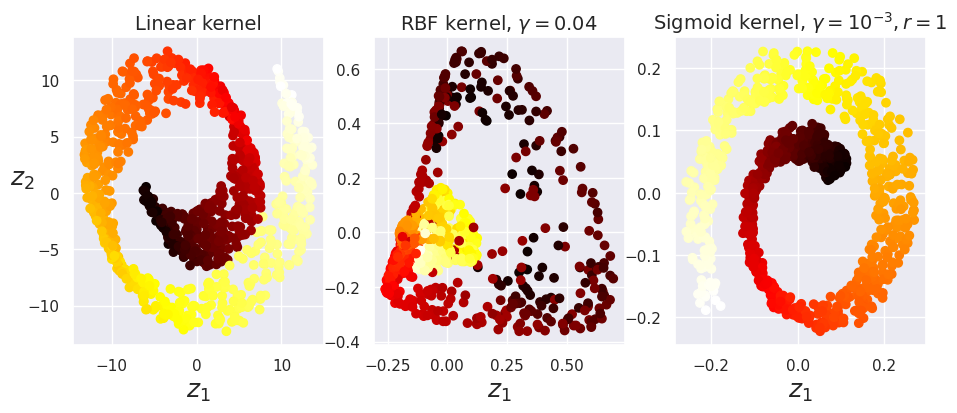

In [8]:
plt.figure(figsize = (11, 4))
for subplot, pca, title in ((131, lin_pca, 'Linear kernel'),
                            (132, rbf_pca, 'RBF kernel, $\gamma = 0.04$'),  # 수식으로 변환
                                                      # 스위스 롤 -> 평면으로 차원 축소
                             (133, sig_pca, 'Sigmoid kernel, $\gamma = 10^{-3}, r = 1$')):
                                # artificial neural network에서 t/f로 이진분류하던 커널
                                # 차원 축소는 되었는데, 원형은 그대로 유지
                                # sigmoid 커널은 데이터에 따라 다른 결과가 나온다.  # 선형은 비선형 데이터에 적용 불가
                             X_reduced = pca.fit_transform(X)  # 차원 축소했는데도 변화 X.
                             if subplot == 132:  # 방사형 커널
                              X_reduced_rbf = X_reduced
                             plt.subplot(subplot)
                             plt.title(title, fontsize = 14)
                             plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = t, cmap = plt.cm.hot)
                             plt.xlabel('$z_1$', fontsize = 18)
                             if subplot == 131:
                               plt.ylabel('$z_2$', fontsize = 18, rotation = 0)
                             plt.grid(True)

# SparsePCA
 - 문장 => 벡터화
 - text frequency 문서 빈도 (단어의 출현 개수)
 - idf (inverse document frequency: 역문서 빈도)
    - 자주 나타나는 단어는 중요한 단어가 아니다.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import SparsePCA

# 문자열을 처리할 때는 다 소문자로 만들거나 대문자로 만든다.
documents = ["Machine learning is powerful.",
             "AI and deep learning are evolving.",
             "Data science uses AI and machine learning.",
             "Natural language processing is a subfield of AI."]

In [14]:
vectorize = TfidfVectorizer()

X_tfidf = vectorize.fit_transform(documents).toarray()

# 희소상태(0이 많은 행렬)를 유지하며 차원 축소
spca = SparsePCA(n_components = 2, alpha = 0.2, random_state = 42)
X_spca = spca.fit_transform(X_tfidf)

print("텍스트 데이터 차원 축소 후:", X_spca.shape)
print("\n차원 축소된 텍스트 데이터(Sparse PCA 적용 후): \n", X_spca)

텍스트 데이터 차원 축소 후: (4, 2)

차원 축소된 텍스트 데이터(Sparse PCA 적용 후): 
 [[-0.30515684  0.54308883]
 [-0.24149071 -0.71078106]
 [-0.23614978 -0.03679821]
 [ 0.78279733  0.20449043]]


In [15]:
X_tfidf[0]  # 유사도 비교가 안됨.  # 차원 축소 = 특징 추출

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.4842629 , 0.        , 0.39205255, 0.4842629 ,
       0.        , 0.        , 0.61422608, 0.        , 0.        ,
       0.        , 0.        ])

# MDS (Multi Demension Scale)

### Hello Ver

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import numpy as np

def make_hello(N=1000, rseed = 42):
  fig, ax = plt.subplots(figsize = (4, 1))
  fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1)
  ax.axis('off')  # 축 생략 (그래프 아니고 이미지 출력할거니까)
  # valign(vertical), halign(horizontal)
  ax.text(0.5, 0.4, 'Hello', va = 'center', ha = 'center', weight = 'bold', size = 85)
  fig.savefig('hello.png')
  plt.close(fig)

  from matplotlib.image import imread
  # 이미지는 좌우가 뒤집혀서 저장되기 때문에 -1을 주고 거꾸로 읽음.
  data = imread('hello.png')[::-1, :, 0].T  # 이미지를 로딩
  print("이미지 차원", data.shape)   # (400, 100)
  print(data)

  # 이미지 만들기 위해서 좌표 생성
  rng = np.random.RandomState(rseed)
  X = rng.rand(4 * N, 2)  # 4000개
  print("만든 갯수", X.shape)
  print("곱한 후의 사이즈", (X * data.shape).shape)

  i, j = (X * data.shape).astype(int).T  # 난수를 이미지 크기로 변환
  mask = (data[i, j] < 1)  # 글씨를 선택: 글씨만 골라내라~
  X = X[mask]
  print("새로운 X 갯수", X.shape)
  print("원래 이미지의 차수 ", data.shape)
  X[:, 0] *= (data.shape[0] / data.shape[1])
  X = X[:N]
  return X[np.argsort(X[:, 0])]  # 이미지 생성

이미지 차원 (400, 100)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
만든 갯수 (4000, 2)
곱한 후의 사이즈 (4000, 2)
새로운 X 갯수 (1491, 2)
원래 이미지의 차수  (400, 100)


<ipython-input-18-c6f62f4bfab5>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorize = dict(c = X[:, 0], cmap = plt.cm.get_cmap('rainbow', 5))


(0.2408268709114415,
 3.7987338209306616,
 0.016724831100744457,
 1.0214480560464654)

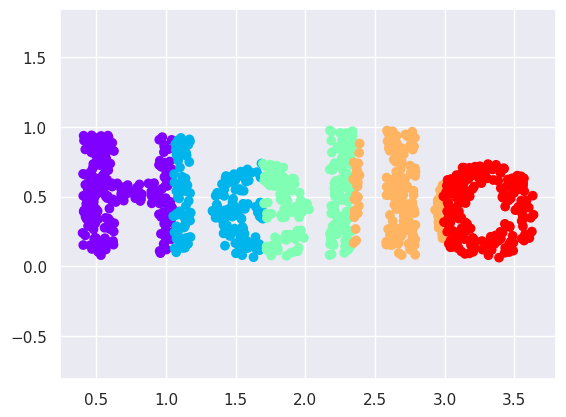

In [18]:
X = make_hello(1000)  # 2개의 좌표
colorize = dict(c = X[:, 0], cmap = plt.cm.get_cmap('rainbow', 5))  # color 5개 맵핑
plt.scatter(X[:, 0], X[:, 1], ** colorize)
plt.axis('equal')

(1000, 2)
<class 'list'>


(4.90194483716472, 8.483867821545502, 5.178587381126667, 6.9334091038973975)

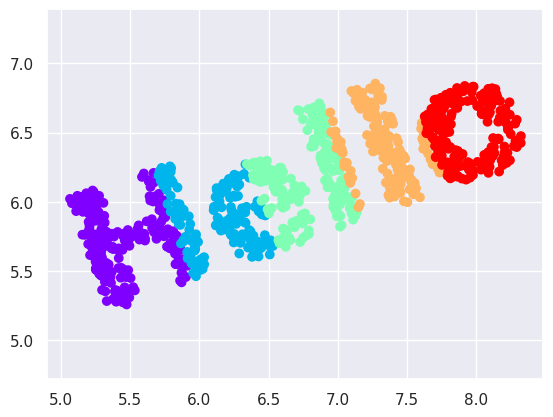

In [19]:
print(X.shape)  # 1,000x2  1,000개의 픽셀

def rotate(X, angle):
  theta = np.deg2rad(angle)  # 각도 -> 라디안
  R = [[np.cos(theta), np.sin(theta)],
       [-np.sin(theta), np.cos(theta)]]  # 회전행렬 -> 새로운 축

  print(type(R))
  return np.dot(X, R)  # 내적

X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal')

### HELLO Ver

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

def make_hello(N=1000, rseed=42):
  fig, ax = plt.subplots(figsize=(4,1))
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
  ax.axis('off') # 축
  # valign(vertical), halign ( horizontal)
  ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold',
          size=85)
  fig.savefig('hello.png') # 파일로 저장
  plt.close(fig)

  from matplotlib.image import imread
  # 이미지는 좌우가 뒤집혀서 저장
  data = imread('hello.png')[::-1, :, 0].T # 이미지를 로딩
  print("이미지차원", data.shape) # (400, 100)

  print(data)
  # 이미지를 만들기 위해서 좌표를 생성
  rng = np.random.RandomState(rseed)
  X = rng.rand(4*N, 2) # 4000개
  print("만든 갯수", X.shape)
  print("곱한후의 사이즈", (X*data.shape).shape)
  i, j = (X * data.shape).astype(int).T # 난수를 이미지 크기로 변환
  mask = (data[i,j] < 1) # 글씨를 선택
  X = X[mask]
  print("새로운 X 갯수", X.shape)
  print("원래 이미지의 차수", data.shape)
  X[:, 0] *= (data.shape[0] / data.shape[1])
  X = X[:N]
  return X[np.argsort(X[:, 0])] # 이미지 생성

이미지차원 (400, 100)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
만든 갯수 (4000, 2)
곱한후의 사이즈 (4000, 2)
새로운 X 갯수 (1784, 2)
원래 이미지의 차수 (400, 100)


<ipython-input-21-da2660ac71f6>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorize = dict(c = X[:, 0], cmap = plt.cm.get_cmap('rainbow', 5))  # color 5개 맵핑


(-0.19972965643412033,
 4.195346643588747,
 0.02244321091604335,
 0.990457146590137)

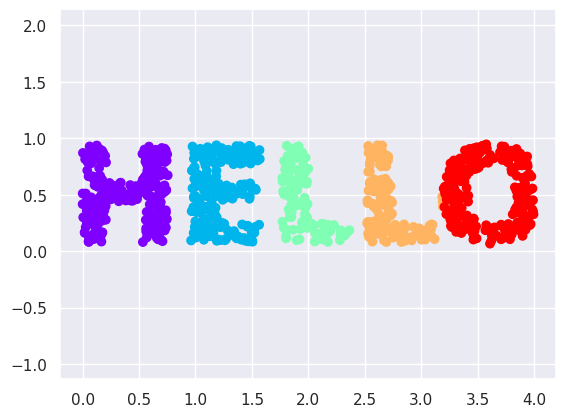

In [21]:
X = make_hello(1000)  # 2개의 좌표
colorize = dict(c = X[:, 0], cmap = plt.cm.get_cmap('rainbow', 5))  # color 5개 맵핑
plt.scatter(X[:, 0], X[:, 1], ** colorize)
plt.axis('equal')

(1000, 2)
<class 'list'>


(4.507487053249943, 8.845503039218586, 4.991879306174322, 7.269254509788998)

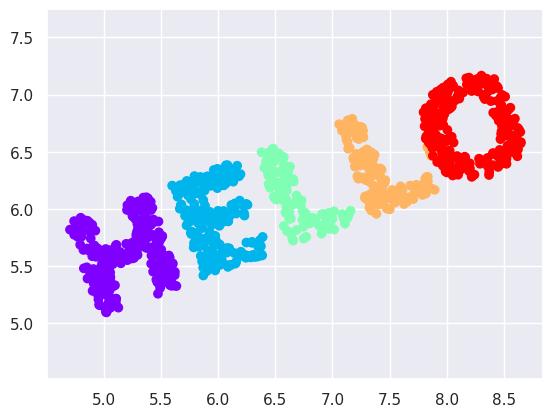

In [22]:
print(X.shape)  # 1,000x2  1,000개의 픽셀

def rotate(X, angle):
  theta = np.deg2rad(angle)  # 각도 -> 라디안
  R = [[np.cos(theta), np.sin(theta)],
       [-np.sin(theta), np.cos(theta)]]  # 회전행렬 -> 새로운 축

  print(type(R))
  return np.dot(X, R)  # 내적

X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal')

# 거리값 재는 함수

In [23]:
# 원래 x가 1000x2 였음.  # 행간거리
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)  # 유클리디안 거리 값
print(D.shape)  # 1000 x 1000
D[:5, :5]

(1000, 1000)


array([[0.        , 0.09456459, 0.45411046, 0.11688862, 0.25021892],
       [0.09456459, 0.        , 0.35954588, 0.21138485, 0.34459142],
       [0.45411046, 0.35954588, 0.        , 0.57087538, 0.70387239],
       [0.11688862, 0.21138485, 0.57087538, 0.        , 0.13339179],
       [0.25021892, 0.34459142, 0.70387239, 0.13339179, 0.        ]])

# 차원 축소

[[-1.73423439 -0.81745868]
 [-1.689606   -0.90184291]
 [-1.5207988  -1.22000565]
 ...
 [ 1.81414877  1.00868682]
 [ 1.76758478  1.09837085]
 [ 1.75972301  1.12145007]]


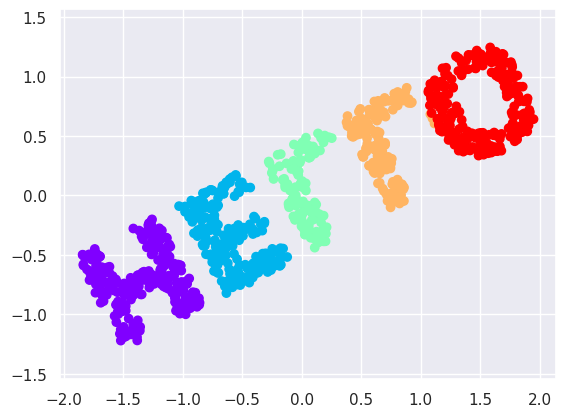

In [24]:
# 거리 값 행렬을 주고 MDS를 함.
# 다차원 척도법
from sklearn.manifold import MDS

# 2차원으로 차원 축소
model = MDS(n_components = 2, dissimilarity = 'precomputed', random_state = 1)
out = model.fit_transform(D)

plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal')

print(out)  # 모양은 달라졌지만, 형태는 유지하고 있음.

# 행렬곱을 활용한 이해

In [25]:
# 1000 x 2   3 x 3  => 1000 x 3  # 임의의 숫자로 만들어진 3차원 축

import numpy as np
rng = np.random.RandomState(10)
C = rng.randn(3, 3)  # 랜덤으로 3x3 행렬 만듦.
print(np.dot(C, C.T))  # 행렬 거듭제곱 => 정방행렬이면서 대칭행렬

e, V = np.linalg.eigh(np.dot(C, C.T))  # 고유값 분해
print('eigenvalue', e)  # 고유값
print('eigenvector', V)  # 고유벡터값  # 정직교 축
print(np.dot(V[0], V[1])) # 0
print(np.dot(V[:, 0], V[:, 1]))  # 0 (직교한다^^.)

[[4.67300869 1.54608517 0.42456214]
 [1.54608517 0.9046519  0.0621289 ]
 [0.42456214 0.0621289  0.0822976 ]]
eigenvalue [0.02629875 0.37332691 5.26033253]
eigenvector [[-0.15797077 -0.30570231 -0.93893095]
 [ 0.20981122  0.9187662  -0.33443672]
 [ 0.9648961  -0.24982947 -0.08099843]]
5.551115123125783e-17
-5.551115123125783e-17


In [26]:
print(C)

[[ 1.3315865   0.71527897 -1.54540029]
 [-0.00838385  0.62133597 -0.72008556]
 [ 0.26551159  0.10854853  0.00429143]]


# 차원확대

In [29]:
def random_projection(X, dimension = 3, rseed = 42):
  assert dimension >= X.shape[1]  # 2보다 작으면 안된다. (그럼 차원축소니까)
  rng = np.random.RandomState(rseed)
  C = rng.randn(dimension, dimension)  # 3 x 3 행렬을 만들어라.
  print("C는 ", C.shape)
  print(np.dot(C, C.T))  # 정방행렬이면서 대칭행렬이 됨.

  e, V = np.linalg.eigh(np.dot(C, C.T))
  print("\nV는", V.shape)
  print("차원은", V[:X.shape[1]])  # 2개만 취하고
  return np.dot(X, V[:X.shape[1]])  # V는 3x3에서 2x3으로 바뀜. => 1000 x 3으로 변환됨.

print(X.shape)  # 1000 x 2
print(X.shape[1])
print("데이터의 차원은", X.shape)

X3 = random_projection(X, 3)  # 3차원으로 random_projection 하라는
X3.shape

(1000, 2)
2
데이터의 차원은 (1000, 2)
C는  (3, 3)
[[0.68534241 0.63723771 0.37423535]
 [0.63723771 2.42926786 2.33541214]
 [0.37423535 2.33541214 3.30327538]]

V는 (3, 3)
차원은 [[-0.63360361  0.75939282  0.14788172]
 [ 0.64803399  0.41652241  0.63762139]]


(1000, 3)

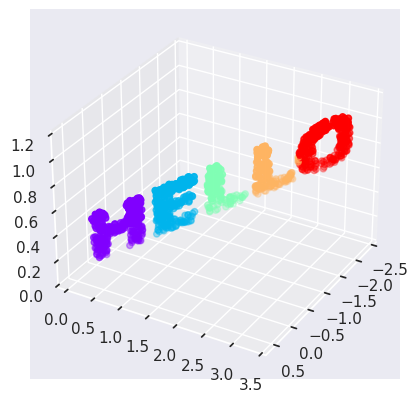

In [36]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection = '3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2], **colorize)
ax.view_init(azim = 30, elev = 30)  # 카메라 초기화 (azim = 좌우, elev = 상하)

# 선형변환 -> 다차원척도법 -> 모양 유지
 - 모양 유지? 잘 되고 있다는 의미

(-0.6213610101546441,
 0.6096799097694806,
 -1.9197055094829893,
 1.9929483861724986)

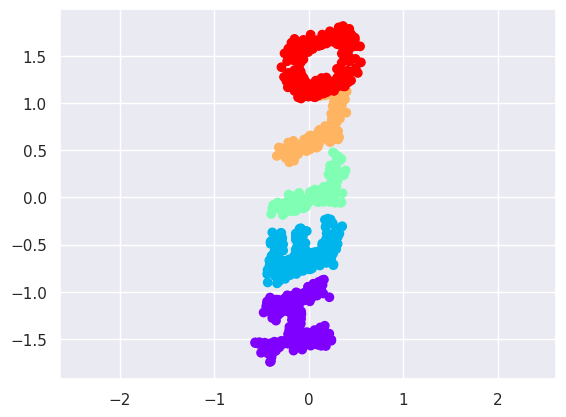

In [37]:
model = MDS(n_components = 3, random_state = 1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal')

#비선형 변환
 - 데이터 자체가 비선형

In [39]:
def make_hello_s_curve(X):
  t = (X[:, 0] - 2) * 0.75 * np.pi  # x축에 대해서 np.pi해서 원형으로 180 돌리고,
  x = np.sin(t)  # sin 함수에 준다.
  y = X[:, 1]
  z = np.sign(t) * (np.cos(t) - 1)  # 사인함수의 부호
  print("x값", np.ptp(x))
  print("y값", np.ptp(y))
  print("z값", np.ptp(z))
  return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

x값 1.9999961272919269
y값 0.8800126687946306
z값 3.999970622756973


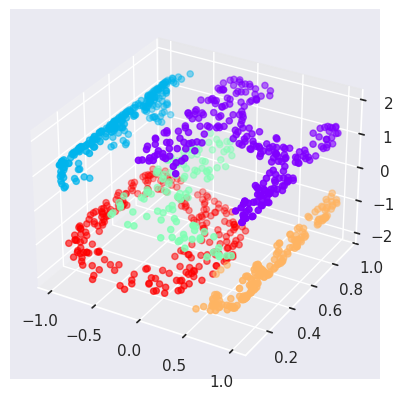

In [40]:
ax = plt.axes(projection = '3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2], **colorize)

(-1.7542649693704555,
 1.7171533174441027,
 -2.253133416776031,
 2.0016781872998273)

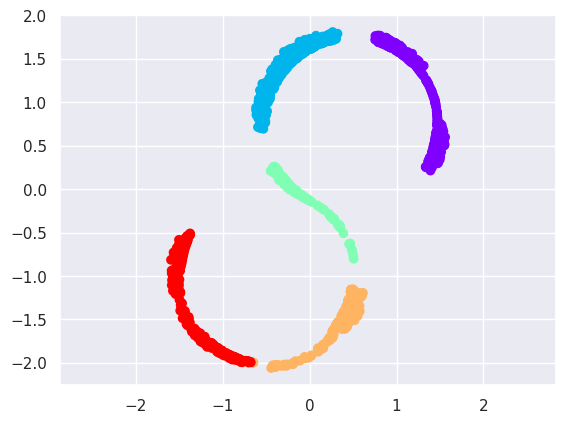

In [41]:
# 위 데이터에 MDS 하기
# 모양이 유지되지 않고, 다형성을 해침

model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal')

### 이럴 때는 (모양 유지 안 될때는) LLE 해야한다.

(0.15, -0.15)

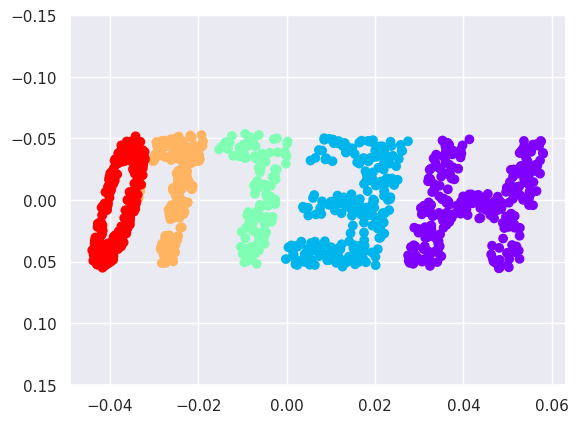

In [42]:
# 비선형 데이터 -> 선형 데이터로 잘 차원 축소
from sklearn.manifold import LocallyLinearEmbedding

# 주변의 100개를 고려해서, 가까운 것은 더 가깝게.. 먼 것은 더 멀리를 유지!
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver = 'dense')
out = model.fit_transform(XS)
fig, ax = plt.subplots()

ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15)